In [3]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 
!pip install scipy 

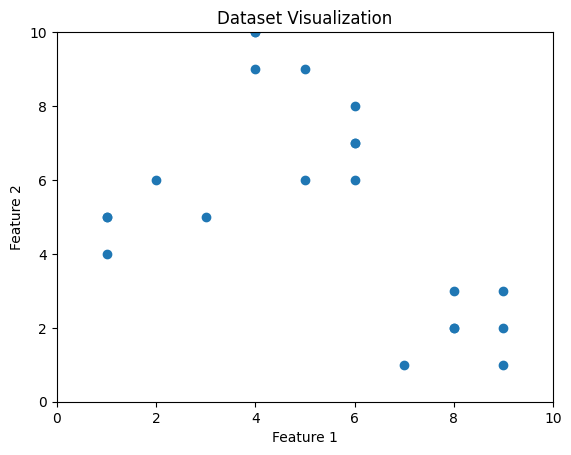

In [4]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.scatter(x1, x2, marker='o')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

building model

In [5]:
distortions=[]
inertias=[]
mapping1={}
mapping2={}
k=range(1,10)

for k in k :
    kmeanModel=KMeans(n_clusters=k,random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)/X.shape[0]))
    inertias.append(kmeanModel.inertia_)
    mapping1[k]=distortions[-1]
    mapping2[k]=distortions[-1]


tabuloating and visualizing results 

Distortions values:
1: 3.6255513311970025
2: 2.0318238533112596
3: 1.242330339174415
4: 0.8367738708386462
5: 0.7757327246151141
6: 0.6759386082013268
7: 0.609038771406205
8: 0.5268674097013409
9: 0.45952390673119364


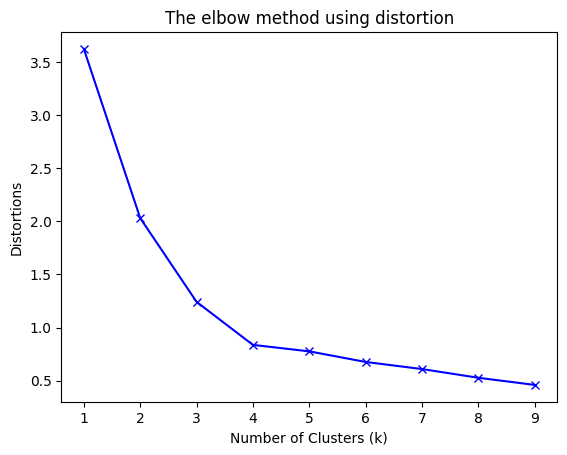

In [13]:
print("Distortions values:")
for key, val in mapping1.items():
    print(f'{key}: {val}')

plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortions')
plt.title('The elbow method using distortion')
plt.show()
#


displaying the values 

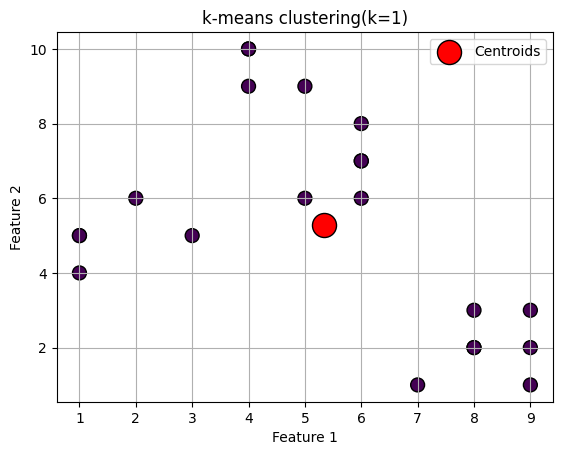

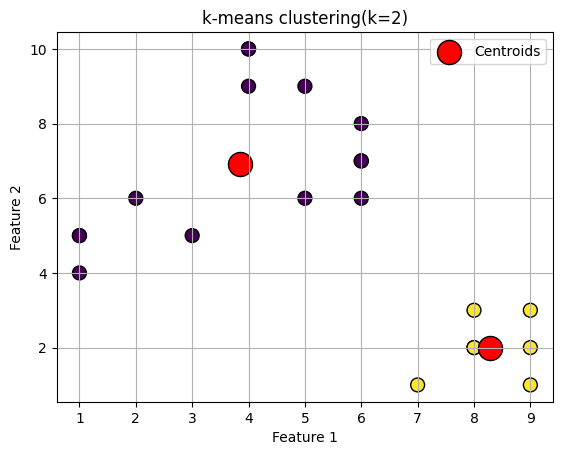

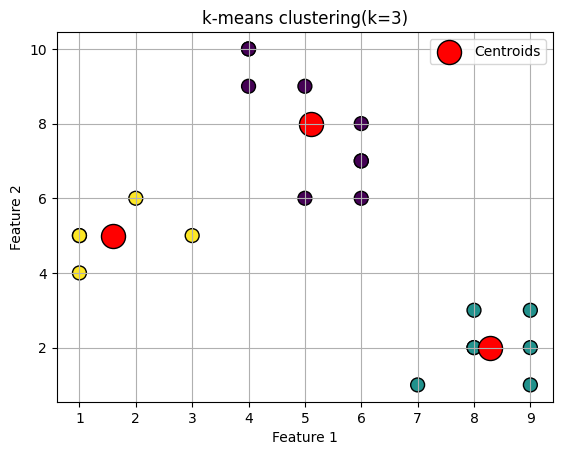

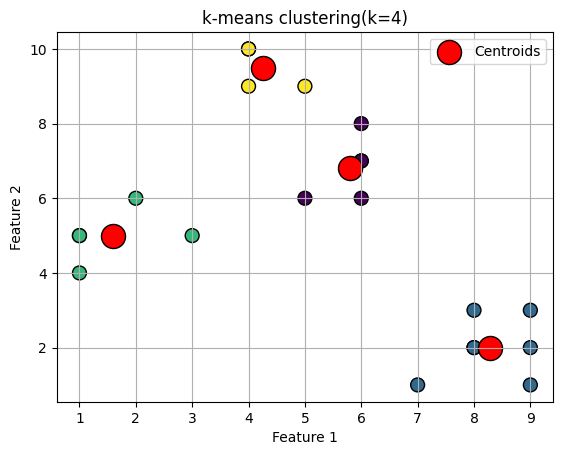

In [14]:
k_range=range(1,5)


for k in k_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    y_means=kmeans.fit_predict(X)

    plt.scatter(X[:,0],X[:,1],c=y_means,cmap='viridis',marker='o',edgecolor='k',s=100)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids',edgecolors='k')
    plt.title(f'k-means clustering(k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()